In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def get_data():
    df=pd.read_csv('ecommerce_data.csv')
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    X[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
    X[:,2]=(X[:,2]-X[:,2].mean())/X[:,2].std()
    N,D=X.shape
    # One hot encoding Categorical Variable
    X2=np.zeros((N,D+3)) # as 4 classes in categorical variable
    X2[:,:D-1]=X[:,:D-1] # copy all variables except Categorical variable
    for i in range(N):
        t=int(X[i,D-1]) # find the class of categorical variable for the index i
        X2[i,t+D-1]=1 # assign the ith row of (D-1+class of categorical variable) column as 1
    return X2,y
def get_binary_data():
    X,y=get_data()
    X2=X[y<=1]
    y2=y[y<=1]
    return X2,y2
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def feed_forward(X,w,b):
    return sigmoid(X.dot(w) + b)
def classification_rate(y,y_pred):
    return np.mean(y==y_pred)
def cross_entropy(y,y_pred):
    E=0
    for i in range(len(y)):
        if y[i]==1:
            E-=np.log(y_pred[i])
        else:
            E-=np.log(1-y_pred[i])
    return E/len(y)
def train_model(X,y,X_test,y_test,w,b,lr,epoch):
    cost=[]
    c_test=[]
    for i in range(epoch):
        w=w-lr*(X.T.dot((feed_forward(X,w,b)-y)))
        b=b-lr*(feed_forward(X,w,b)-y).sum()
        y_pred_train=feed_forward(X,w,b)
        y_pred_test=feed_forward(X_test,w,b)
        cost.append(cross_entropy(y,y_pred_train))
        c_test.append(cross_entropy(y_test,y_pred_test))
    return y_pred_train,y_pred_test,w,b,cost,c_test
if __name__=='__main__':
    X,y=get_binary_data()
    N,D=X.shape
    w=np.random.randn(D)
    tr_i=np.random.choice(N,int(np.round(0.7*N)))
    X_train=X[tr_i]
    y_train=y[tr_i]
    t_i=[i for i in range(N) if i not in tr_i]
    X_test=X[t_i]
    y_test=y[t_i]    
    b=20 # bias term
    p_x=feed_forward(X,w,b)
    print('Classification Rate: ',classification_rate(y,np.round(p_x)))
#     p,w_n,b_n,c=train_model(X,y,w,b,0.001,1000)
#     print('Classification Rate: ',classification_rate(y,np.round(p)))
    p_tr,p_t,w_t,b_n,c_train,c_test=train_model(X_train,y_train,X_test,y_test,w,b,0.001,100)
    print('Classification Rate for Train Sample: ',classification_rate(y_train,np.round(feed_forward(X_train,w_t,b_n))))
    print('Classification Rate for Test Sample: ',classification_rate(y_test,np.round(feed_forward(X_test,w_t,b_n))))



Classification Rate:  0.36432160804020103
Classification Rate for Train Sample:  0.9498207885304659
Classification Rate for Test Sample:  0.975609756097561


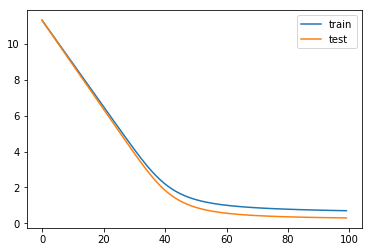

In [36]:
plt.plot(c_train,label='train')
plt.plot(c_test,label='test')
plt.legend()
plt.show()

In [12]:
w

array([ 0.21335123, -0.74111846, -0.42244869,  0.57547467, -0.19543616,
        0.20225153, -1.66696107,  0.0361599 ])

In [14]:
b_n

4.314281433612435

In [4]:
df.describe()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.486000,0.854000,1.055880,0.518000,1.588000,0.74800
std,0.500305,1.046362,0.976711,0.500176,1.121057,0.89336
min,0.000000,0.000000,0.000141,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.328550,0.000000,1.000000,0.00000
50%,0.000000,1.000000,0.804717,1.000000,2.000000,0.00000
75%,1.000000,1.000000,1.499518,1.000000,3.000000,1.00000
max,1.000000,4.000000,6.368775,1.000000,3.000000,3.00000


In [28]:
Z=np.zeros((N,4))

In [29]:
Z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [34]:
Z[np.arange(N),X[:,D-1].astype(np.int32)]=1

In [35]:
Z

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [37]:
(X2[:,-4:]-Z).sum()

0.0